In [30]:
import pandas as pd

# Carregar o arquivo train.csv
train_df = pd.read_csv('train.csv')

# Exibir as primeiras linhas do dataset
print(train_df.head())

# Verificar informações gerais sobre o dataset
print(train_df.info())

# Verificar valores nulos
print(train_df.isnull().sum())

# Descrição estatística das colunas numéricas
print(train_df.describe())


   id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
None
id             0
keyword       61
lo

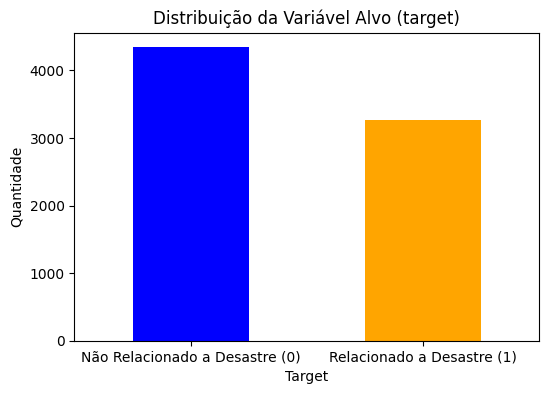

In [31]:
# Distribuição da coluna target
import matplotlib.pyplot as plt

# Contagem dos valores da coluna target
target_counts = train_df['target'].value_counts()

# Plotar gráfico de barras
plt.figure(figsize=(6, 4))
target_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribuição da Variável Alvo (target)')
plt.xlabel('Target')
plt.ylabel('Quantidade')
plt.xticks([0, 1], ['Não Relacionado a Desastre (0)', 'Relacionado a Desastre (1)'], rotation=0)
plt.show()


In [32]:
# Exibir o número de valores nulos em cada coluna
missing_data = train_df.isnull().sum()
print(missing_data[missing_data > 0])


keyword       61
location    2533
dtype: int64


In [33]:
# Top 10 keywords mais frequentes
top_keywords = train_df['keyword'].value_counts().head(10)
print("Top 10 Keywords:\n", top_keywords)

# Top 10 localidades mais frequentes
top_locations = train_df['location'].value_counts().head(10)
print("Top 10 Locations:\n", top_locations)


Top 10 Keywords:
 keyword
fatalities     45
deluge         42
armageddon     42
sinking        41
damage         41
harm           41
body%20bags    41
outbreak       40
evacuate       40
fear           40
Name: count, dtype: int64
Top 10 Locations:
 location
USA                104
New York            71
United States       50
London              45
Canada              29
Nigeria             28
UK                  27
Los Angeles, CA     26
India               24
Mumbai              22
Name: count, dtype: int64


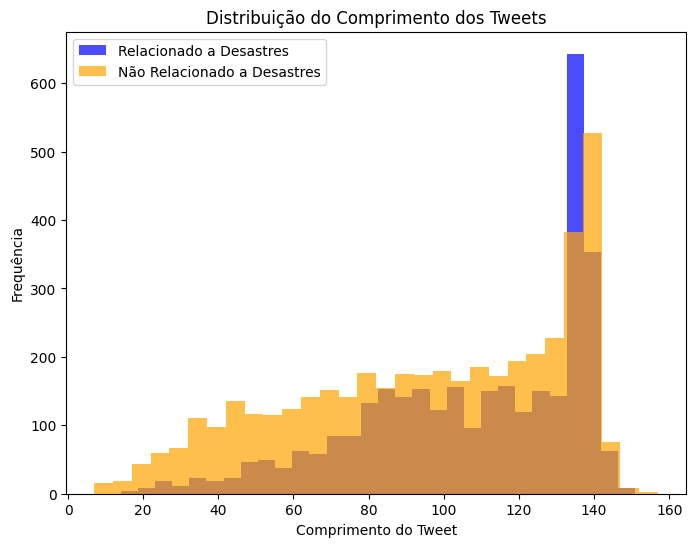

In [34]:
# Adicionar uma coluna com o comprimento dos tweets
train_df['tweet_length'] = train_df['text'].apply(len)

# Comparar a distribuição de comprimento de tweets para tweets relacionados a desastres e não relacionados
plt.figure(figsize=(8, 6))
train_df[train_df['target'] == 1]['tweet_length'].plot(kind='hist', bins=30, alpha=0.7, label='Relacionado a Desastres', color='blue')
train_df[train_df['target'] == 0]['tweet_length'].plot(kind='hist', bins=30, alpha=0.7, label='Não Relacionado a Desastres', color='orange')
plt.title('Distribuição do Comprimento dos Tweets')
plt.xlabel('Comprimento do Tweet')
plt.ylabel('Frequência')
plt.legend()
plt.show()


## Análise Exploratória dos Dados do Dataset `train.csv`

### 1. Informações Básicas do Dataset
A primeira etapa da análise foi carregar o dataset e visualizar as informações gerais. O dataset possui 7.613 entradas e 5 colunas principais: `id`, `keyword`, `location`, `text` e `target`. A coluna `target` é a variável alvo, onde 1 indica que o tweet está relacionado a desastres, e 0 significa que não está relacionado a desastres. Observamos que:
- As colunas `keyword` e `location` possuem valores nulos (61 e 2533 valores faltantes, respectivamente).
- A coluna `text` (com o texto dos tweets) e a coluna `target` não possuem valores nulos, o que é crucial para garantir a integridade das análises subsequentes.

### 2. Distribuição da Variável Alvo (`target`)
A visualização da distribuição da variável `target` mostra que há um leve desbalanceamento entre as classes:
- **Não relacionado a desastres (0)**: 4.343 tweets
- **Relacionado a desastres (1)**: 3.270 tweets

Esse desbalanceamento não é severo o que indica que o modelo pode funcionar bem, mesmo que não seja perfeito.

### 3. Verificação de Palavras-Chave e Localizações
Verificamos as palavras-chave (`keyword`) e as localidades (`location`) mais frequentes. As 10 palavras-chave mais frequentes incluem termos diretamente relacionados a desastres, como "fatalities", "deluge", "evacuate" e "outbreak", indicando que a coluna `keyword` pode ser um bom indicativo para classificação.

Para a coluna `location`, a distribuição é mais ampla, com localizações como "USA", "New York" e "London" aparecendo frequentemente. No entanto, uma parte significativa dos tweets não possui dados de localização, indicando que não há muita utilidade dessa coluna para análise.

### 4. Distribuição do Comprimento dos Tweets
Analisamos o comprimento dos tweets e verificamos que:
- Tweets relacionados a desastres tendem a ser ligeiramente mais longos, concentrando-se perto do limite de 140 caracteres (tamanho máximo permitido pelo Twitter quando os dados foram coletados).
- Tweets não relacionados a desastres apresentam uma distribuição mais uniforme ao longo dos comprimentos de texto, embora também haja um pico próximo ao limite de 140 caracteres.

Essa diferença sugere que os tweets de desastres podem conter mais detalhes ou hashtags, o que pode ser útil para o processo de classificação.

### Conclusão da Análise Exploratória
Com base nessa análise inicial, podemos concluir que o dataset é relativamente balanceado e possui características que podem ser aproveitadas para a tarefa de classificação. As colunas `keyword` e `text` serão particularmente úteis para treinar modelos de aprendizado de máquina.


In [35]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import nltk

# Download necessary NLTK resources
nltk.download('punkt_tab')
nltk.download('stopwords')

# Initialize stopwords and stemmer
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

# Function to clean and preprocess text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove punctuation and special characters
    text = re.sub(r'\W', ' ', text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords and apply stemming
    cleaned_text = ' '.join([stemmer.stem(word) for word in tokens if word not in stop_words])
    return cleaned_text

# Apply preprocessing to the text column
train_df['cleaned_text'] = train_df['text'].apply(preprocess_text)

# Display the first few rows of the dataset with cleaned text
train_df[['text', 'cleaned_text']].head()


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\rafae\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rafae\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,cleaned_text
0,Our Deeds are the Reason of this #earthquake M...,deed reason earthquak may allah forgiv us
1,Forest fire near La Ronge Sask. Canada,forest fire near la rong sask canada
2,All residents asked to 'shelter in place' are ...,resid ask shelter place notifi offic evacu she...
3,"13,000 people receive #wildfires evacuation or...",13 000 peopl receiv wildfir evacu order califo...
4,Just got sent this photo from Ruby #Alaska as ...,got sent photo rubi alaska smoke wildfir pour ...


In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed

# Fit and transform the cleaned text
X = tfidf.fit_transform(train_df['cleaned_text'])

# Target labels
y = train_df['target']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Initialize models
logreg = LogisticRegression(max_iter=1000)
svm = SVC(kernel='linear')
nb = MultinomialNB()

# Train and evaluate Logistic Regression
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_logreg))

# Train and evaluate SVM
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Report:\n", classification_report(y_test, y_pred_svm))

# Train and evaluate Naive Bayes
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print("Naive Bayes Report:\n", classification_report(y_test, y_pred_nb))


Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.79      0.87      0.83       874
           1       0.80      0.68      0.73       649

    accuracy                           0.79      1523
   macro avg       0.79      0.78      0.78      1523
weighted avg       0.79      0.79      0.79      1523

SVM Report:
               precision    recall  f1-score   support

           0       0.79      0.86      0.83       874
           1       0.79      0.70      0.74       649

    accuracy                           0.79      1523
   macro avg       0.79      0.78      0.78      1523
weighted avg       0.79      0.79      0.79      1523

Naive Bayes Report:
               precision    recall  f1-score   support

           0       0.80      0.88      0.84       874
           1       0.82      0.70      0.75       649

    accuracy                           0.81      1523
   macro avg       0.81      0.79      0.80      1523
weighted av

In [38]:
import numpy as np
from sklearn.metrics import balanced_accuracy_score

# Function to downsample the dataset and evaluate performance
def dataset_size_analysis(model, X, y, sizes):
    results = []
    for size in sizes:
        # Downsample the dataset
        X_sample, _, y_sample, _ = train_test_split(X, y, train_size=size, random_state=42)
        # Train the model
        model.fit(X_sample, y_sample)
        # Make predictions on the full test set
        y_pred = model.predict(X_test)
        # Calculate balanced accuracy
        accuracy = balanced_accuracy_score(y_test, y_pred)
        results.append((size, accuracy))
        print(f"Size: {size}, Balanced Accuracy: {accuracy}")
    return results

# Define different sizes to tests
sizes = [0.1, 0.25, 0.5, 0.75, 0.99]

# Run dataset size analysis for Naive Bayes (since it performed best)
nb = MultinomialNB()
size_analysis_results = dataset_size_analysis(nb, X_train, y_train, sizes)


Size: 0.1, Balanced Accuracy: 0.7162894507656561
Size: 0.25, Balanced Accuracy: 0.7543906661542312
Size: 0.5, Balanced Accuracy: 0.7730102287271741
Size: 0.75, Balanced Accuracy: 0.7830943927111944
Size: 0.99, Balanced Accuracy: 0.7908443900667459


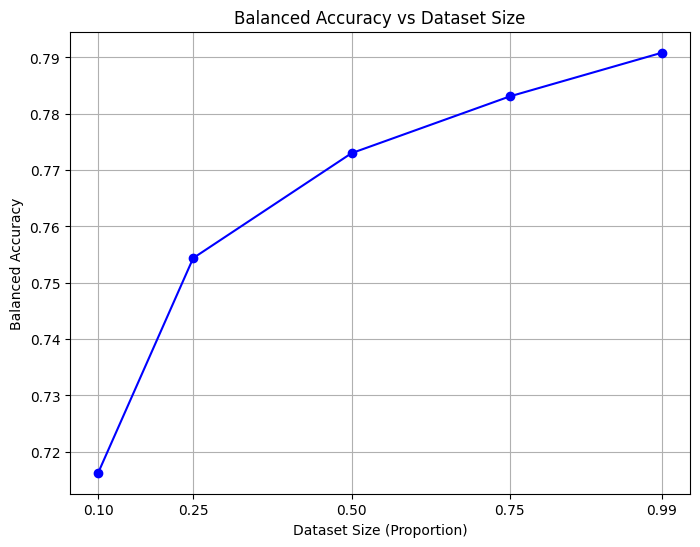

In [39]:
import matplotlib.pyplot as plt

# Convert results to arrays for plotting
sizes = [result[0] for result in size_analysis_results]
accuracies = [result[1] for result in size_analysis_results]

# Plotting the results
plt.figure(figsize=(8, 6))
plt.plot(sizes, accuracies, marker='o', linestyle='-', color='b')
plt.title('Balanced Accuracy vs Dataset Size')
plt.xlabel('Dataset Size (Proportion)')
plt.ylabel('Balanced Accuracy')
plt.xticks(sizes)
plt.grid(True)
plt.show()


A partir do gráfico de "Balanced Accuracy vs Dataset Size", podemos concluir que o desempenho do modelo de Naive Bayes melhora à medida que o tamanho do conjunto de dados aumenta. Inicialmente, entre 10% e 25% do tamanho do dataset, há um ganho significativo na acurácia balanceada. No entanto, os ganhos começam a diminuir conforme o tamanho do dataset ultrapassa 50%, com um leve aumento de performance até 99% dos dados. Isso indica que, embora o aumento da quantidade de dados beneficie o modelo, os retornos são cada vez menores a partir de certo ponto, sugerindo que mais dados não necessariamente trarão grandes melhorias adicionais.


In [52]:
X_train_full = tfidf.fit_transform(train_df['cleaned_text']) 
y_train_full = train_df['target']  # Variável alvo

nb.fit(X_train_full, y_train_full)

# Carregar o arquivo test.csv
test_df = pd.read_csv('test.csv')

# Aplicar o mesmo pré-processamento
test_df['cleaned_text'] = test_df['text'].apply(preprocess_text)

# Converter o texto em features com o TF-IDF já ajustado
X_test_final = tfidf.transform(test_df['cleaned_text'])

# Fazer previsões usando o modelo treinado
test_predictions = nb.predict(X_test_final)

# Adicionar as previsões no DataFrame de teste
test_df['prediction'] = test_predictions

# Exibir as primeiras linhas do DataFrame com as previsões
test_df[['text', 'prediction']].head()



,text,prediction
0,Just happened a terrible car crash,1
1,"Heard about #earthquake is different cities, s...",0
2,"there is a forest fire at spot pond, geese are...",1
3,Apocalypse lighting. #Spokane #wildfires,1
4,Typhoon Soudelor kills 28 in China and Taiwan,1
